# Logistic Regression

You are provided with a dataset available in the Google Drive folder at the following link:
https://drive.google.com/drive/folders/1NB2zIk679jlZC1x0gZPS4ugfHIO1aq1p

The dataset contains information related to social network advertisements, including user attributes such as age and estimated salary, along with a binary target variable indicating whether a user purchased the advertised product or not.

The goal is to build a Logistic Regression classification model to predict whether a user will purchase the advertised product based on their Age and Estimated Salary.

Perform the following tasks:

## Importing the libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

## Importing the dataset

In [37]:
from google.colab import files
uploaded = files.upload()
data_df = pd.read_csv(list(uploaded.keys())[0])
data_df.head()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Select Features and Target Variable



In [38]:
x=data_df.iloc[:,2:4].to_numpy()
y=data_df.iloc[:,4].to_numpy()
x=x.astype('float')
y=y.astype('float')
x = (x - x.mean(axis=0)) / x.std(axis=0)


## Splitting the dataset into the Training set and Test set

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42,shuffle=True)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(340, 2) (60, 2) (340,) (60,)


## Feature Scaling

In [40]:
def P(x, a, b):
    z = np.matmul(x, a) + b
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))


In [41]:
def loss(x, a, b, y):
    Prob = P(x, a, b)
    eps = 1e-15
    Prob = np.clip(Prob, eps, 1 - eps)
    return np.sum(y*np.log(Prob) + (1-y)*np.log(1-Prob))


In [42]:
def gradient(x,a,b,y):
    m,n=x.shape
    Prob=P(x,a,b)
    g=(y-Prob)[:, np.newaxis]
    da= np.mean(g*x,axis=0)
    db=np.mean(y-Prob)
    assert(da.shape==(n,))
    return (da,db)

In [43]:
def gradient_ascent(x,y,learning_rate=0.01,epochs = 10):
    m,n=x.shape
    a=np.zeros(n,)
    loss_m=[]
    b=0

    for i in range(epochs):

        l=loss(x,a,b,y)
        loss_m.append(l)
        da,db=gradient(x,a,b,y)
        a=a+da*learning_rate
        b=b+db*learning_rate
        print("Epoch ",i+1," Completed!","likelihood = ",l)

    print("Training completed!!")
    assert(a.shape==(n,))
    return (loss_m,a,b)





## Training the Logistic Regression model on the Training set

In [44]:
epochs = 200
learn_rate = 0.001

liklihood,a,b = gradient_ascent(x_train,y_train,learn_rate,epochs)

Epoch  1  Completed! likelihood =  -235.6700413903814
Epoch  2  Completed! likelihood =  -235.62645146474728
Epoch  3  Completed! likelihood =  -235.5828849504622
Epoch  4  Completed! likelihood =  -235.5393418348311
Epoch  5  Completed! likelihood =  -235.4958221051619
Epoch  6  Completed! likelihood =  -235.45232574876533
Epoch  7  Completed! likelihood =  -235.4088527529551
Epoch  8  Completed! likelihood =  -235.365403105048
Epoch  9  Completed! likelihood =  -235.32197679236353
Epoch  10  Completed! likelihood =  -235.27857380222434
Epoch  11  Completed! likelihood =  -235.23519412195603
Epoch  12  Completed! likelihood =  -235.1918377388871
Epoch  13  Completed! likelihood =  -235.14850464034913
Epoch  14  Completed! likelihood =  -235.1051948136767
Epoch  15  Completed! likelihood =  -235.06190824620725
Epoch  16  Completed! likelihood =  -235.01864492528142
Epoch  17  Completed! likelihood =  -234.9754048382428
Epoch  18  Completed! likelihood =  -234.93218797243804
Epoch  19  

## Predicting the Test set results

In [45]:
y_prob_test = P(x_test, a, b)
y_pred_test = (y_prob_test >= 0.5).astype(int)
accuracy = np.mean(y_pred_test == y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.85


## Making the Confusion Matrix

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Visualising the Training set results

In [46]:
def plot_decision_boundary(x, y, a, b, title):
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max, 200),
        np.linspace(x2_min, x2_max, 200)
    )

    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = P(grid, a, b).reshape(xx1.shape)

    # Decision boundary (p = 0.5)
    plt.contour(xx1, xx2, probs, levels=[0.5])

    # Scatter points
    plt.scatter(x[y==0, 0], x[y==0, 1], label='Class 0')
    plt.scatter(x[y==1, 0], x[y==1, 1], label='Class 1')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title(title)
    plt.show()


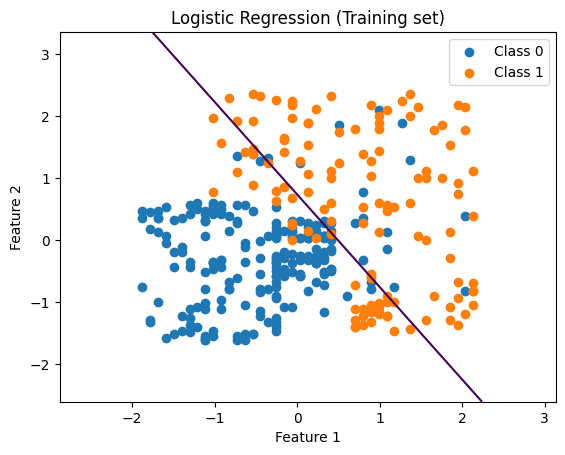

In [47]:
plot_decision_boundary(
    x_train,
    y_train,
    a,
    b,
    title="Logistic Regression (Training set)"
)


## Visualising the Test set results

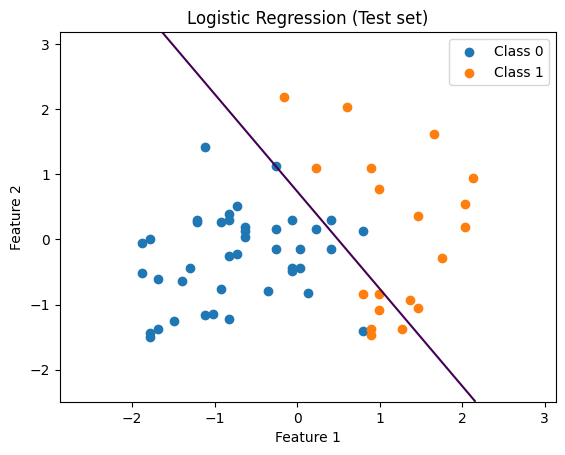

In [48]:
plot_decision_boundary(
    x_test,
    y_test,
    a,
    b,
    title="Logistic Regression (Test set)"
)
